# Online PyEmittance

The following will work either on a production system, or with a simulated EPICS server.

For local development, start a simulated EPICS server using the `simulated_epics.ipynb` notebook, or run in a separate process:

```python
from pyemittance.simulation_server import start_server
start_server()
```

In [1]:
from pyemittance import PyEmittance, print_logging
import numpy as np
print_logging() # Print log messages here

In [2]:
meas = PyEmittance(config_name='LCLS2_OTR0H04')
meas.online = True

# Set some other options
meas.add_pnts = False
meas.num_points = 7   # only matters if adapt_ranges is used.
meas.adapt_ranges = True  # If helping, will ensure there are at least 7 total points
meas.check_sym = True
meas.infl_check = True

meas.show_plots = True
meas

In [3]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 1,
 'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
 'amp_threshold': 150,
 'min_sigma': 3,
 'max_sigma': 700,
 'max_samples': 1,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

2023-01-05 23:33:18,715 | INFO : Running online!
2023-01-05 23:33:18,757 | INFO : EPICS put QUAD:HTR:120:BCTRL = -6
2023-01-05 23:33:19,609 | INFO : 2023-01-05_23-33-19-609356
2023-01-05 23:33:19,727 | INFO : EPICS put QUAD:HTR:120:BCTRL = -4
2023-01-05 23:33:20,106 | INFO : 2023-01-05_23-33-20-106645
2023-01-05 23:33:20,209 | INFO : EPICS put QUAD:HTR:120:BCTRL = -2
2023-01-05 23:33:20,560 | INFO : 2023-01-05_23-33-20-560615
2023-01-05 23:33:20,653 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0
2023-01-05 23:33:21,012 | INFO : 2023-01-05_23-33-21-012080
2023-01-05 23:33:21,109 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.7245472762413484
2023-01-05 23:33:21,465 | INFO : 2023-01-05_23-33-21-465131
2023-01-05 23:33:21,610 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.1871227302011237
2023-01-05 23:33:21,967 | INFO : 2023-01-05_23-33-21-967804
2023-01-05 23:33:22,062 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0.350301815839101
2023-01-05 23:33:22,422 | INFO : 2023-01-05_23-33-22-422840
2023-01-05 23:

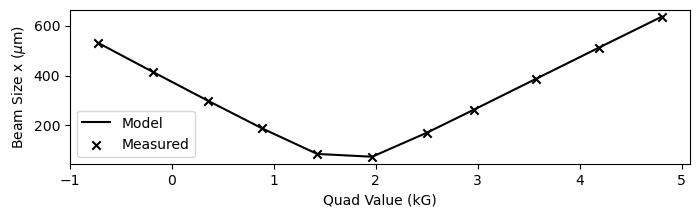

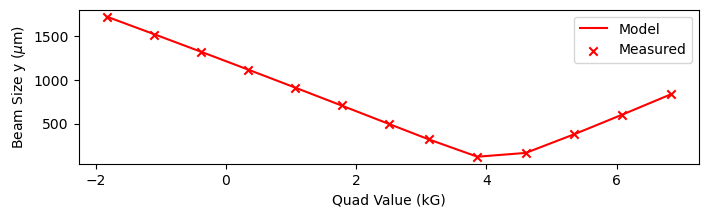

In [4]:
result = meas.measure_emittance()

# Examine results

In [5]:
import matplotlib.pyplot as plt

In [6]:
result

{'quadvalsx': array([-0.72454728, -0.18712273,  0.35030182,  0.88772636,  1.42515091,
         1.96257545,  2.5       ,  2.96064961,  3.57484909,  4.18904857,
         4.80324805]),
 'beamsizesx': array([5.30820740e-04, 4.15414965e-04, 2.99256483e-04, 1.88530912e-04,
        8.59125951e-05, 7.49852638e-05, 1.70728053e-04, 2.63458752e-04,
        3.86698426e-04, 5.11786370e-04, 6.33680712e-04]),
 'beamsizeserrx': array([0.0292757 , 0.01945601, 0.01153004, 0.00650277, 0.0017725 ,
        0.00141631, 0.00501787, 0.01063841, 0.01811217, 0.02983673,
        0.041216  ]),
 'error_x': False,
 'emit_x': 6.417267396910009e-09,
 'norm_emit_x': 1.0046418268932144e-06,
 'beta_x': 9.923824549816691,
 'alpha_x': -1.9817735510381005,
 'emit_x_err': 1.7539748602065205e-07,
 'norm_emit_x_err': 2.7458985248629806e-05,
 'beta_x_rel_err': 27.33211430539859,
 'alpha_x_rel_err': -1.7397989382975044e-15,
 'sigma_11': 6.36838357361938e-08,
 'sigma_12': 1.2717570797135375e-08,
 'sigma_22': 3.1863333211298568e-

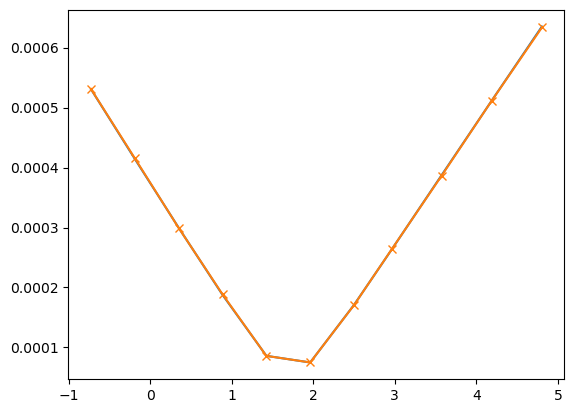

In [7]:
plt.plot(result['quadvalsx'], np.sqrt(result['screen_sigma_11']))
plt.plot(result['quadvalsx'], result['beamsizesx'], marker='x')

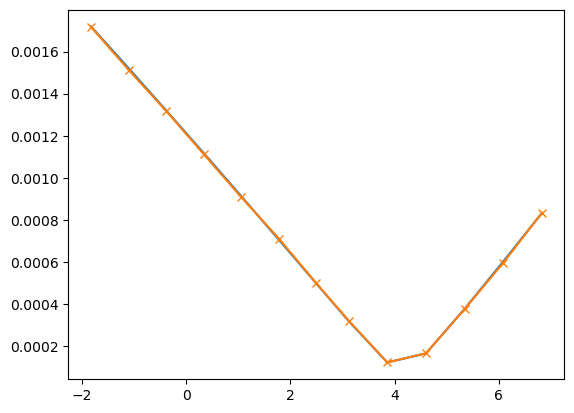

In [8]:
plt.plot(result['quadvalsy'], np.sqrt(result['screen_sigma_33']))
plt.plot(result['quadvalsy'], result['beamsizesy'], marker='x')

# Interactively change the quad and acquire the screen image

0.00037486171231124573


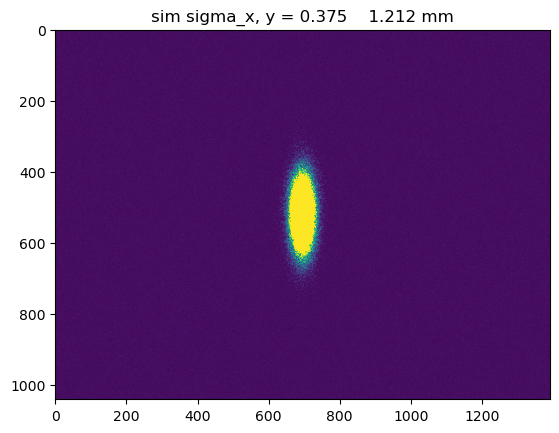

In [9]:
import epics
import matplotlib.pyplot as plt

from ipywidgets import interact

def f(quad_value):
    epics.caput('QUAD:HTR:120:BCTRL', quad_value)
    a = epics.caget('OTRS:HTR:330:Image:ArrayData').reshape(1040, 1392)
    sigma_x = epics.caget('sim_screen_sigma_x')
    sigma_y = epics.caget('sim_screen_sigma_y')  
    print(sigma_x)
    plt.imshow(a, vmax=128)
    plt.title(f'sim sigma_x, y = {sigma_x*1e3:0.3f}    {sigma_y*1e3:0.3f} mm')
    
# interact(f, quad_value=(-4, 4, .1))    
f(0)